In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #for saving the model

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Load and Explore the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1     

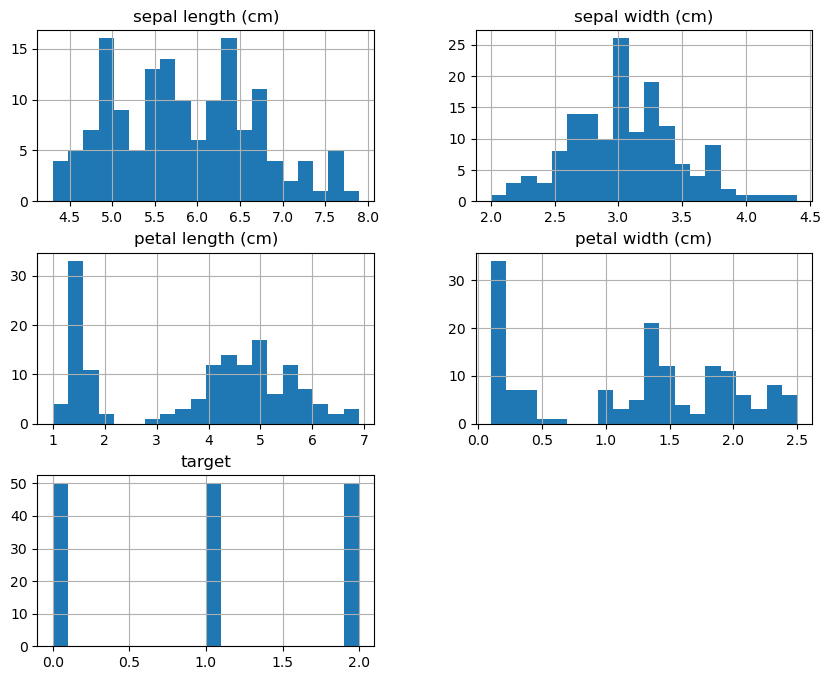

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.info())
print(df.head())

print(df.isnull().sum())

df.hist(figsize=(10,8), bins=20)
plt.show()

Visualize the Data (EDA - Explarotary Data Analysis)

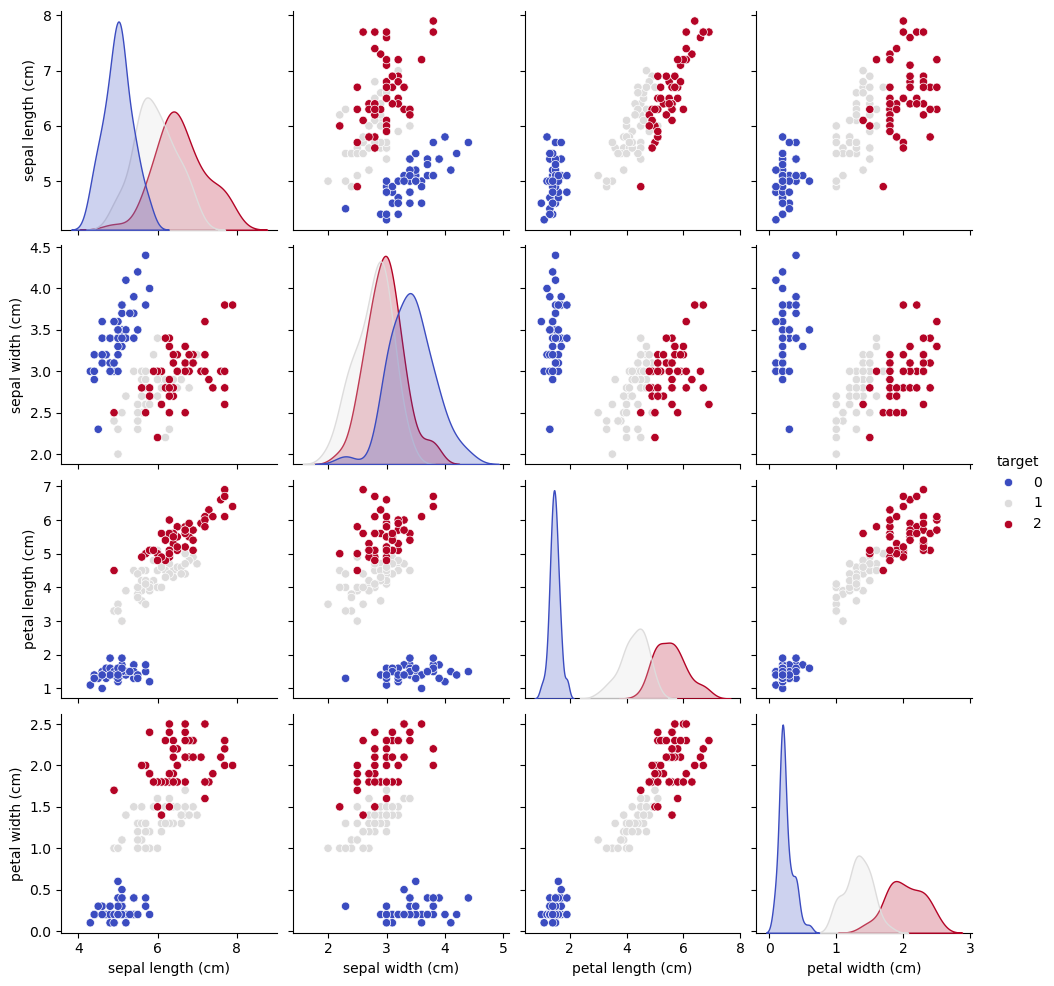

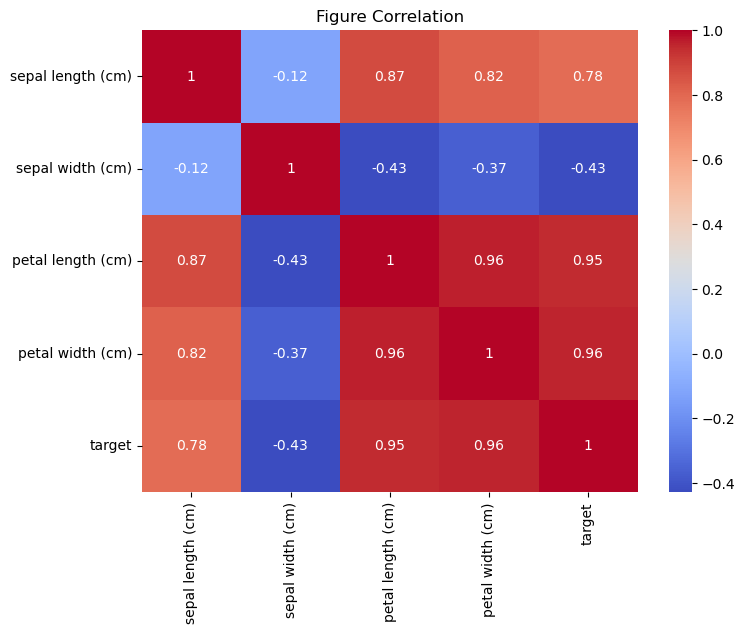

In [10]:
#pairplot to visualize feature distribution
sns.pairplot(df, hue='target',palette='coolwarm')
plt.show()

#coorelation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Figure Correlation")
plt.show()

Preprocess the Data

In [18]:
#Split data into features (X) and target (Y)
X=df.iloc[:,:-1]#features
y=df['target']#Target labels


#Splits data into training (80%) and testing (20%) while preserving class balance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)


#Standardizes features to improve model performance.
Scaler = StandardScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

Train the Machine Learning Model

In [23]:
model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

with open("model.pkl","wb") as f:
    pickle.dump(model, f)#Saves

print("Model trained and saved in model.pkl")


#pickle is a Python module for serializing objects (converting them into a file for storage).
#"wb" mode → Opens the file in write-binary mode. 



            #Random Forest Classifier:- A powerful ensemble learning method that
            #  creates multiple decision trees and combines their outputs



           # n_estimators=100 → The number of decision trees in the forest 
           # (more trees generally improve accuracy but increase training time).



#random_state=42 → Ensures reproducibility
#  (same results every time the code runs).

Model trained and saved in model.pkl


Evaluating the model


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



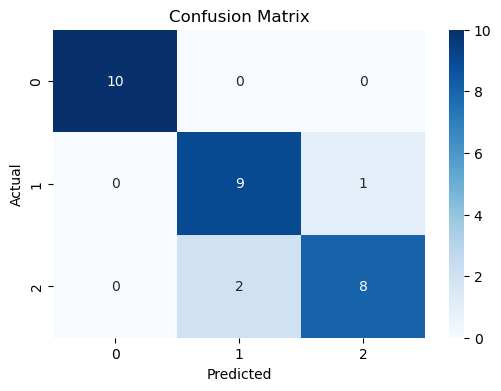

In [24]:
y_pred = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()